## Reinforcement Learning Project
### Frozen Lake Problem

Folder Descriptions:
1. Run 4:
    - is_slippery = False
    - learning_rate_a = 0.9
    - discount_factor_g = 0.9
    - epsilon_decay_rate = 0.0001
    - Episodes = 15000
    - Penalties added
    - Reward for goal added

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv

%matplotlib inline

## Create Custom Environment

In [2]:
class CustomRewardFrozenLakeEnv(gym.Wrapper):
    def __init__(self, env, goal_reward, hole_penalty, step_penalty):
        super().__init__(env)
        self.goal_reward = goal_reward
        self.hole_penalty = hole_penalty
        self.step_penalty = step_penalty

    def step(self, action):
        observations, reward, done, info, _ = self.env.step(action)
        # Modify rewards based on the outcome
        if done:
            if reward == 1:  # Original reward for reaching the goal is 1
                reward = self.goal_reward
            else:  # Assume falling into a hole
                reward = self.hole_penalty
        else:
            reward += self.step_penalty  # Add penalty for each step
        return observations, reward, done, info

In [3]:
def run(episodes, is_training=True, render=False):
    
    env_original = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode='human' if render else None)
    
    # Wrap the environment with your custom class
    env = CustomRewardFrozenLakeEnv(env_original, goal_reward=15, hole_penalty=-2, step_penalty=-0.5)
    
    # Initialize q-table with 0s if training else load 
    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
    else:
        f = open('Trained_policy.pkl', 'rb')
        q = pickle.load(f)
        f.close()

        
    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.0001        # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng()   # random number generator

    
    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        
        # Print epoch number after each 20% episodes are completed
        if episodes >= 5 and (i+1) % (int(episodes * 0.2)) == 0:
            print(f'episode {i+1}')
        
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state, reward, terminated, truncated = env.step(action)
            
            # Accumulate reward
            rewards_per_episode[i] += reward

            if is_training:
                q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )
                
            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if(epsilon==0):
            learning_rate_a = 0.0001

    env.close()

    
    # Calculate running sum of rewards
    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    
    
    ## Print plot
    plt.xlabel('Episodes')
    plt.ylabel('Running Sum of Rewards (100 episodes)')
    
    if is_training:
        plt.title('Agent Training')
    else:
        plt.title('Agent Testing')
    plt.plot(sum_rewards)
    
    
    ## Save plot
    if is_training:
        plt.savefig(f'Train_graph_{episodes}.png')
    else:
        plt.savefig(f'Test_graph_{episodes}.png')
    
    
    # Save q-table
    if is_training:
        f = open(f"Trained_policy.pkl","wb")
        pickle.dump(q, f)
        f.close()
    
    
    return rewards_per_episode


## Training

episode 3000
episode 6000
episode 9000
episode 12000
episode 15000
Total Runtime: 3.6300129890441895


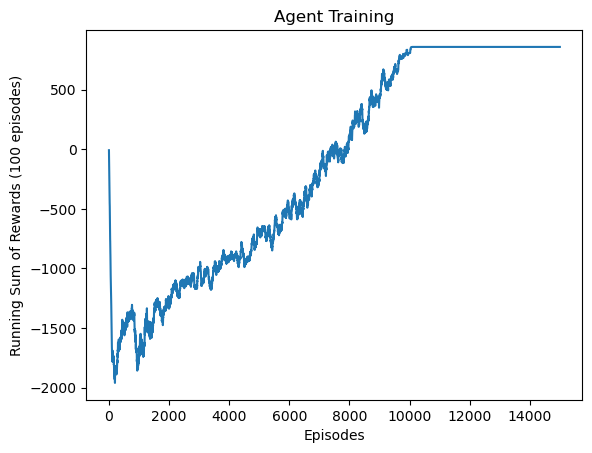

In [4]:
start_time = time.time()

rewards_per_episode = run(15000, is_training=True, render=False)

print(f'Total Runtime: {time.time() - start_time}')

In [6]:
set(rewards_per_episode)

{-51.5,
 -50.0,
 -49.0,
 -48.5,
 -48.0,
 -47.5,
 -47.0,
 -46.5,
 -46.0,
 -45.5,
 -45.0,
 -44.5,
 -43.5,
 -43.0,
 -42.5,
 -42.0,
 -41.5,
 -41.0,
 -40.0,
 -39.5,
 -39.0,
 -38.5,
 -38.0,
 -37.5,
 -37.0,
 -36.5,
 -36.0,
 -35.5,
 -35.0,
 -34.5,
 -34.0,
 -33.5,
 -33.0,
 -32.5,
 -32.0,
 -31.5,
 -31.0,
 -30.5,
 -30.0,
 -29.5,
 -29.0,
 -28.5,
 -28.0,
 -27.5,
 -27.0,
 -26.5,
 -26.0,
 -25.5,
 -25.0,
 -24.5,
 -24.0,
 -23.5,
 -23.0,
 -22.5,
 -22.0,
 -21.5,
 -21.0,
 -20.5,
 -20.0,
 -19.5,
 -19.0,
 -18.5,
 -18.0,
 -17.5,
 -17.0,
 -16.5,
 -16.0,
 -15.5,
 -15.0,
 -14.5,
 -14.0,
 -13.5,
 -13.0,
 -12.5,
 -12.0,
 -11.5,
 -11.0,
 -10.5,
 -10.0,
 -9.5,
 -9.0,
 -8.5,
 -8.0,
 -7.5,
 -7.0,
 -6.5,
 -6.0,
 -5.5,
 -5.0,
 -4.5,
 -4.0,
 -3.5,
 -3.0,
 -2.5,
 -2.0,
 -1.5,
 -1.0,
 -0.5,
 0.0,
 0.5,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5}

## Testing

episode 200
episode 400
episode 600
episode 800
episode 1000


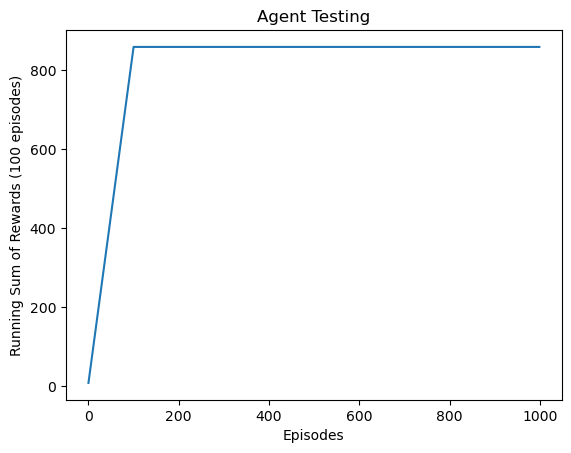

In [7]:
rewards_per_episode = run(1000, is_training=False, render=False)

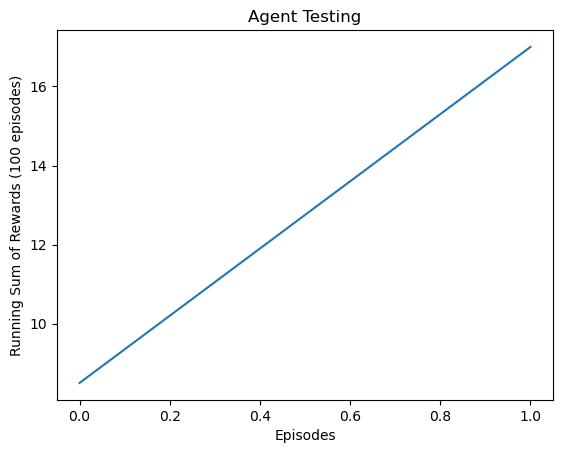

In [8]:
rewards_per_episode = run(2, is_training=False, render=True)